# Exercice naissance

Faites une représentation en box-plot du nombre de naissances par habitant en fonction du département en Île-de-France en dehors de Paris. Et interprétez les données.

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [100]:
birth = pd.read_csv('base_cc_comparateur.CSV', sep=";")

# CODGEO P18_POP NAISD20
birth.head()

/home/dylan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CODGEO,P18_POP,P13_POP,SUPERF,NAIS1318,DECE1318,P18_MEN,NAISD20,DECESD20,P18_LOG,...,P18_ACT1564,ETTOT18,ETAZ18,ETBE18,ETFZ18,ETGU18,ETGZ18,ETOQ18,ETTEF118,ETTEFP1018
0,01001,771.0,767.0,15.95,44.0,22.0,311.000000,10,7,353.730435,...,377.730192,13.0,2.0,0.0,3.0,6.0,1.0,2.0,11.0,2.0
1,01002,253.0,236.0,9.15,23.0,5.0,105.156379,1,0,174.392742,...,128.061728,3.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
2,01004,14204.0,14359.0,24.60,1092.0,606.0,6531.148636,237,150,7341.584896,...,6925.258335,559.0,2.0,30.0,51.0,395.0,165.0,81.0,402.0,128.0
3,01005,1720.0,1635.0,15.92,90.0,39.0,710.392817,21,14,773.926652,...,894.747475,43.0,1.0,5.0,11.0,22.0,8.0,4.0,34.0,4.0
4,01006,112.0,108.0,5.88,7.0,6.0,53.963636,0,1,75.546970,...,59.054545,2.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0


In [101]:
d = {
    "CODGEO": birth["CODGEO"].astype('str').str[:2], 
    "P18_POP": birth["P18_POP"], 
    "NAISD20": birth["NAISD20"]
}

df = pd.DataFrame(data=d)
df.head()

,CODGEO,P18_POP,NAISD20
0,01,771.0,10
1,01,253.0,1
2,01,14204.0,237
3,01,1720.0,21
4,01,112.0,0


In [102]:
mask = df["CODGEO"].isin(["77","78","91","92","93","94","95"])
df = df.drop(df[~mask].index)
df.head()

,CODGEO,P18_POP,NAISD20
29978,77,1134.0,8
29979,77,830.0,9
29980,77,344.0,2
29981,77,287.0,6
29982,77,3274.0,31


In [103]:
df["ratio"] = np.round((df["NAISD20"] / df["P18_POP"]) * 1000, 2)

print(df.head())

      CODGEO  P18_POP  NAISD20  ratio
29978     77   1134.0        8   7.05
29979     77    830.0        9  10.84
29980     77    344.0        2   5.81
29981     77    287.0        6  20.91
29982     77   3274.0       31   9.47


In [104]:
df.describe()

,P18_POP,NAISD20,ratio
count,1267.000000,1267.000000,1267.000000
mean,7922.530387,112.320442,11.422904
std,15497.935498,242.913916,5.365141
min,25.000000,0.000000,0.000000
25%,549.500000,5.000000,7.930000
50%,1339.000000,14.000000,11.280000
75%,6658.000000,78.000000,14.570000
max,121334.000000,2041.000000,48.000000


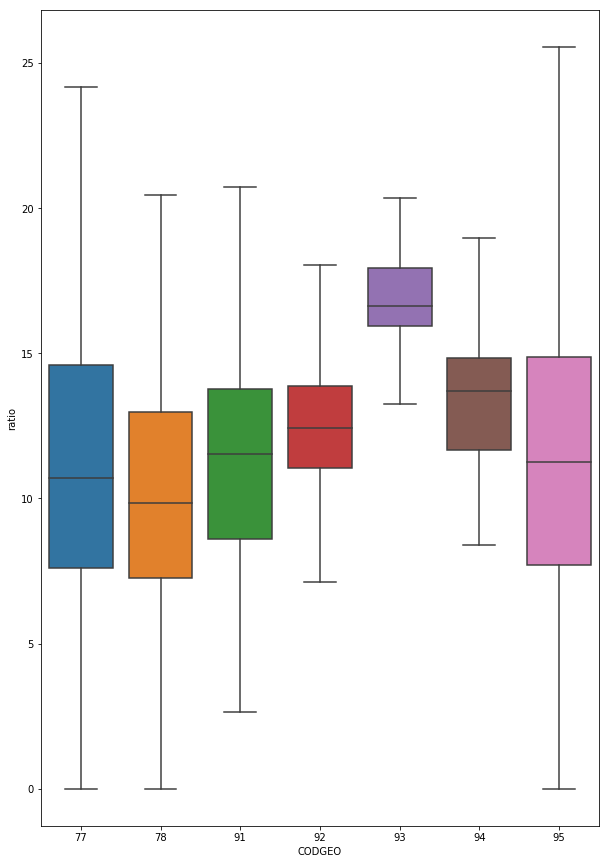

In [105]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(x="CODGEO", y="ratio", data=df, showfliers=False);

- Dans le 93, on peut voir que le nombre de naissances par habitants est beaucoup plus élevé que dans les autres départements

- A part dans le 93, 50% des villes dans les autres départements ont un ratio compris entre 8 et 15 naissances pour 1000 habitants, en France, le taux de natalité est de 10,9 pour mille.